# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [7]:
if os.name=='nt':
    !pip install wget
    import wget

In [8]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 72417, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 72417 (delta 2), reused 5 (delta 1), pack-reused 72410
Receiving objects: 100% (72417/72417), 579.07 MiB | 43.36 MiB/s, done.
Resolving deltas: 100% (51244/51244), done.


In [10]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python3 -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
Defaulting to user installation because normal site-packages is not writeable
Processing /home/paperspace/Desktop/ANPR/TFODCourse/Tensorflow/models/research
  Preparing metadata (setup.py) ... done


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1692785 sha256=76f8d8d216786907679bbca69d8fe27d1b93d3bfa63bd7478f38b770e2924c9a
  Stored in directory: /tmp/pip-ephem-wheel-cache-t9s50urf/wheels/53/b2/91/b54fdfe05333d6844d4be1d992861c81bb3323012a1e9f4eb8
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [5]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python3 {VERIFICATION_SCRIPT}

2022-05-02 02:23:04.709088: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:23:04.843677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:23:04.844677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Running tests under Python 3.8.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-05-02 02:23:04.869074: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-criti

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul): 0.14s
I0502 02:23:13.174787 140692937602880 test_util.py:2373] time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul): 0.14s
[       OK ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul
[ RUN      ] ModelBuilderTF2Test.test_create_rfcn_model_from_config
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_rfcn_model_from_config): 0.14s
I0502 02:23:13.310693 140692937602880 test_util.py:2373] time(__main__.ModelBuilderTF2Test.test_create_rfcn_model_from_config): 0.14s
[       OK ] ModelBuilderTF2Test.test_create_rfcn_model_from_config
[ RUN      ] ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config): 0.04s
I0502 02:23:13.351835 140692937602880 test_util.py:2373] time(__main__.Model

I0502 02:23:18.736693 140692937602880 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet EfficientNet backbone version: efficientnet-b2
I0502 02:23:18.736933 140692937602880 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 112
I0502 02:23:18.737013 140692937602880 ssd_efficientnet_bifpn_feature_extractor.py:148] EfficientDet BiFPN num iterations: 5
I0502 02:23:18.739052 140692937602880 efficientnet_model.py:144] round_filter input=32 output=32
I0502 02:23:18.762480 140692937602880 efficientnet_model.py:144] round_filter input=32 output=32
I0502 02:23:18.762765 140692937602880 efficientnet_model.py:144] round_filter input=16 output=16
I0502 02:23:18.970578 140692937602880 efficientnet_model.py:144] round_filter input=16 output=16
I0502 02:23:18.970766 140692937602880 efficientnet_model.py:144] round_filter input=24 output=24
I0502 02:23:19.308636 140692937602880 efficientnet_model.py:144] round_filter input=24 output=24
I0502 02:23:19.308902 14

I0502 02:23:25.141473 140692937602880 efficientnet_model.py:144] round_filter input=16 output=24
I0502 02:23:25.141677 140692937602880 efficientnet_model.py:144] round_filter input=24 output=32
I0502 02:23:25.571936 140692937602880 efficientnet_model.py:144] round_filter input=24 output=32
I0502 02:23:25.572141 140692937602880 efficientnet_model.py:144] round_filter input=40 output=56
I0502 02:23:26.058166 140692937602880 efficientnet_model.py:144] round_filter input=40 output=56
I0502 02:23:26.058347 140692937602880 efficientnet_model.py:144] round_filter input=80 output=112
I0502 02:23:26.790887 140692937602880 efficientnet_model.py:144] round_filter input=80 output=112
I0502 02:23:26.791104 140692937602880 efficientnet_model.py:144] round_filter input=112 output=160
I0502 02:23:27.916639 140692937602880 efficientnet_model.py:144] round_filter input=112 output=160
I0502 02:23:27.916837 140692937602880 efficientnet_model.py:144] round_filter input=192 output=272
I0502 02:23:28.876651 

I0502 02:23:38.605408 140692937602880 efficientnet_model.py:144] round_filter input=112 output=200
I0502 02:23:38.605597 140692937602880 efficientnet_model.py:144] round_filter input=192 output=344
I0502 02:23:39.780471 140692937602880 efficientnet_model.py:144] round_filter input=192 output=344
I0502 02:23:39.780741 140692937602880 efficientnet_model.py:144] round_filter input=320 output=576
I0502 02:23:40.153358 140692937602880 efficientnet_model.py:144] round_filter input=1280 output=2304
I0502 02:23:40.207330 140692937602880 efficientnet_model.py:454] Building model efficientnet with params ModelConfig(width_coefficient=1.8, depth_coefficient=2.6, resolution=528, dropout_rate=0.5, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_rati

In [12]:
!pip install tensorflow tensorflow-gpu --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [13]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.15.7
Uninstalling protobuf-3.15.7:
  Successfully uninstalled protobuf-3.15.7
Found existing installation: matplotlib 3.4.1
Uninstalling matplotlib-3.4.1:
  Successfully uninstalled matplotlib-3.4.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires grpcio<2,>=1.29.0, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow 2.5.0rc0 requires astunparse~=1.6.3, which is not installed.
tensorflow 2.5.0rc0 requires flatbuffers~=1.12.0, which is not installed.
tensorflow 2.5.0rc0 requires gast==0.4.0, which is not installed.
tensorflow 2.5.0rc0 requires go


  Using cached matplotlib-3.2.0-cp37-cp37m-win_amd64.whl (9.2 MB)


In [6]:
import object_detection

In [18]:
!pip list

Package                       Version             Location
----------------------------- ------------------- --------------------------------------------------------
absl-py                       0.12.0
apache-beam                   2.28.0
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
cached-property               1.5.2
cachetools                    4.2.1
certifi                       2020.12.5
chardet                       4.0.0
colorama                      0.4.4
contextlib2                   0.6.0.post1
cycler                        0.10.0
cython                        3.0a6
dataclasses                   0.8
decorator                     5.0.3
flatbuffers                   1.12
gast                          0.4.0
gin-config                    0.4.0
google-api-python-client      2.1.0
google-auth                   1.28.0
google-auth-oauthlib          0.4.4
google-cloud-bigquery         2.13.1
google-pasta                 

In [14]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-05-01 17:00:07--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.164.176, 2607:f8b0:4004:815::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.164.176|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.1s    

2022-05-01 17:00:07 (139 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_t

# 2. Create Label Map

In [7]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [16]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 2.67 KiB | 2.67 MiB/s, done.


In [17]:
files['TF_RECORD_SCRIPT']

'Tensorflow/scripts/generate_tfrecord.py'

In [18]:
!python3 {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python3 {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [19]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [8]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [9]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [10]:
config

{'model': ssd {
   num_classes: 1
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [23]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [24]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [25]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [26]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [27]:
command = "python3 {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [28]:
print(command)

python3 Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=10000


In [29]:
!{command}

2022-05-01 17:08:43.579983: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-01 17:08:43.588056: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-01 17:08:43.589032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-01 17:08:43.590485: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

/home/paperspace/.local/lib/python3.8/site-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '
2022-05-01 17:09:19.954818: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201
2022-05-01 17:09:21.579106: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I0501 17:09:25.027029 140436834506560 cross_device_ops.py:616] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/ta

INFO:tensorflow:Step 800 per-step time 0.103s
I0501 17:11:23.278195 140436834506560 model_lib_v2.py:705] Step 800 per-step time 0.103s
INFO:tensorflow:{'Loss/classification_loss': 0.32326216,
 'Loss/localization_loss': 0.27870473,
 'Loss/regularization_loss': 0.15538706,
 'Loss/total_loss': 0.7573539,
 'learning_rate': 0.069333196}
I0501 17:11:23.278494 140436834506560 model_lib_v2.py:708] {'Loss/classification_loss': 0.32326216,
 'Loss/localization_loss': 0.27870473,
 'Loss/regularization_loss': 0.15538706,
 'Loss/total_loss': 0.7573539,
 'learning_rate': 0.069333196}
INFO:tensorflow:Step 900 per-step time 0.102s
I0501 17:11:33.527281 140436834506560 model_lib_v2.py:705] Step 900 per-step time 0.102s
INFO:tensorflow:{'Loss/classification_loss': 0.3073015,
 'Loss/localization_loss': 0.32243907,
 'Loss/regularization_loss': 0.1554495,
 'Loss/total_loss': 0.7851901,
 'learning_rate': 0.074666604}
I0501 17:11:33.527657 140436834506560 model_lib_v2.py:708] {'Loss/classification_loss': 0.30

INFO:tensorflow:Step 2300 per-step time 0.103s
I0501 17:14:00.129781 140436834506560 model_lib_v2.py:705] Step 2300 per-step time 0.103s
INFO:tensorflow:{'Loss/classification_loss': 0.13819875,
 'Loss/localization_loss': 0.1296002,
 'Loss/regularization_loss': 0.15367614,
 'Loss/total_loss': 0.4214751,
 'learning_rate': 0.07986114}
I0501 17:14:00.130100 140436834506560 model_lib_v2.py:708] {'Loss/classification_loss': 0.13819875,
 'Loss/localization_loss': 0.1296002,
 'Loss/regularization_loss': 0.15367614,
 'Loss/total_loss': 0.4214751,
 'learning_rate': 0.07986114}
INFO:tensorflow:Step 2400 per-step time 0.104s
I0501 17:14:10.506224 140436834506560 model_lib_v2.py:705] Step 2400 per-step time 0.104s
INFO:tensorflow:{'Loss/classification_loss': 0.22388761,
 'Loss/localization_loss': 0.16443504,
 'Loss/regularization_loss': 0.15338713,
 'Loss/total_loss': 0.5417098,
 'learning_rate': 0.07983897}
I0501 17:14:10.506586 140436834506560 model_lib_v2.py:708] {'Loss/classification_loss': 0.2

INFO:tensorflow:Step 3800 per-step time 0.103s
I0501 17:16:35.152437 140436834506560 model_lib_v2.py:705] Step 3800 per-step time 0.103s
INFO:tensorflow:{'Loss/classification_loss': 0.13414541,
 'Loss/localization_loss': 0.117789514,
 'Loss/regularization_loss': 0.14835906,
 'Loss/total_loss': 0.40029398,
 'learning_rate': 0.079357184}
I0501 17:16:35.152716 140436834506560 model_lib_v2.py:708] {'Loss/classification_loss': 0.13414541,
 'Loss/localization_loss': 0.117789514,
 'Loss/regularization_loss': 0.14835906,
 'Loss/total_loss': 0.40029398,
 'learning_rate': 0.079357184}
INFO:tensorflow:Step 3900 per-step time 0.105s
I0501 17:16:45.670361 140436834506560 model_lib_v2.py:705] Step 3900 per-step time 0.105s
INFO:tensorflow:{'Loss/classification_loss': 0.35448042,
 'Loss/localization_loss': 0.20051031,
 'Loss/regularization_loss': 0.14805588,
 'Loss/total_loss': 0.70304656,
 'learning_rate': 0.07931058}
I0501 17:16:45.670687 140436834506560 model_lib_v2.py:708] {'Loss/classification_l

INFO:tensorflow:Step 5300 per-step time 0.103s
I0501 17:19:11.837831 140436834506560 model_lib_v2.py:705] Step 5300 per-step time 0.103s
INFO:tensorflow:{'Loss/classification_loss': 0.15129843,
 'Loss/localization_loss': 0.109073274,
 'Loss/regularization_loss': 0.14229582,
 'Loss/total_loss': 0.40266752,
 'learning_rate': 0.07848949}
I0501 17:19:11.838144 140436834506560 model_lib_v2.py:708] {'Loss/classification_loss': 0.15129843,
 'Loss/localization_loss': 0.109073274,
 'Loss/regularization_loss': 0.14229582,
 'Loss/total_loss': 0.40266752,
 'learning_rate': 0.07848949}
INFO:tensorflow:Step 5400 per-step time 0.104s
I0501 17:19:22.196492 140436834506560 model_lib_v2.py:705] Step 5400 per-step time 0.104s
INFO:tensorflow:{'Loss/classification_loss': 0.16392058,
 'Loss/localization_loss': 0.19266313,
 'Loss/regularization_loss': 0.14183669,
 'Loss/total_loss': 0.49842042,
 'learning_rate': 0.078418896}
I0501 17:19:22.196787 140436834506560 model_lib_v2.py:708] {'Loss/classification_lo

INFO:tensorflow:Step 6800 per-step time 0.105s
I0501 17:21:47.601620 140436834506560 model_lib_v2.py:705] Step 6800 per-step time 0.105s
INFO:tensorflow:{'Loss/classification_loss': 0.09043849,
 'Loss/localization_loss': 0.070676245,
 'Loss/regularization_loss': 0.13610294,
 'Loss/total_loss': 0.29721767,
 'learning_rate': 0.0772661}
I0501 17:21:47.601894 140436834506560 model_lib_v2.py:708] {'Loss/classification_loss': 0.09043849,
 'Loss/localization_loss': 0.070676245,
 'Loss/regularization_loss': 0.13610294,
 'Loss/total_loss': 0.29721767,
 'learning_rate': 0.0772661}
INFO:tensorflow:Step 6900 per-step time 0.105s
I0501 17:21:58.084041 140436834506560 model_lib_v2.py:705] Step 6900 per-step time 0.105s
INFO:tensorflow:{'Loss/classification_loss': 0.12175227,
 'Loss/localization_loss': 0.103331156,
 'Loss/regularization_loss': 0.13561505,
 'Loss/total_loss': 0.36069846,
 'learning_rate': 0.077172145}
I0501 17:21:58.084544 140436834506560 model_lib_v2.py:708] {'Loss/classification_los

INFO:tensorflow:Step 8300 per-step time 0.104s
I0501 17:24:25.365121 140436834506560 model_lib_v2.py:705] Step 8300 per-step time 0.104s
INFO:tensorflow:{'Loss/classification_loss': 0.106021605,
 'Loss/localization_loss': 0.18284892,
 'Loss/regularization_loss': 0.12958448,
 'Loss/total_loss': 0.418455,
 'learning_rate': 0.07569829}
I0501 17:24:25.365420 140436834506560 model_lib_v2.py:708] {'Loss/classification_loss': 0.106021605,
 'Loss/localization_loss': 0.18284892,
 'Loss/regularization_loss': 0.12958448,
 'Loss/total_loss': 0.418455,
 'learning_rate': 0.07569829}
INFO:tensorflow:Step 8400 per-step time 0.104s
I0501 17:24:35.760452 140436834506560 model_lib_v2.py:705] Step 8400 per-step time 0.104s
INFO:tensorflow:{'Loss/classification_loss': 0.17391157,
 'Loss/localization_loss': 0.12802869,
 'Loss/regularization_loss': 0.12909484,
 'Loss/total_loss': 0.4310351,
 'learning_rate': 0.07558186}
I0501 17:24:35.760783 140436834506560 model_lib_v2.py:708] {'Loss/classification_loss': 0

INFO:tensorflow:Step 9800 per-step time 0.105s
I0501 17:27:01.819067 140436834506560 model_lib_v2.py:705] Step 9800 per-step time 0.105s
INFO:tensorflow:{'Loss/classification_loss': 0.070866525,
 'Loss/localization_loss': 0.032527562,
 'Loss/regularization_loss': 0.122705124,
 'Loss/total_loss': 0.22609922,
 'learning_rate': 0.07380057}
I0501 17:27:01.819370 140436834506560 model_lib_v2.py:708] {'Loss/classification_loss': 0.070866525,
 'Loss/localization_loss': 0.032527562,
 'Loss/regularization_loss': 0.122705124,
 'Loss/total_loss': 0.22609922,
 'learning_rate': 0.07380057}
INFO:tensorflow:Step 9900 per-step time 0.104s
I0501 17:27:12.199084 140436834506560 model_lib_v2.py:705] Step 9900 per-step time 0.104s
INFO:tensorflow:{'Loss/classification_loss': 0.1565748,
 'Loss/localization_loss': 0.15929681,
 'Loss/regularization_loss': 0.12225411,
 'Loss/total_loss': 0.4381257,
 'learning_rate': 0.073662736}
I0501 17:27:12.199410 140436834506560 model_lib_v2.py:708] {'Loss/classification_

# 7. Evaluate the Model

In [20]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [21]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [11]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [12]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

2022-05-02 04:02:01.990305: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 04:02:01.999978: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 04:02:02.000643: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 04:02:02.002344: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

# 9. Detect from an Image

In [13]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [15]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars402.png')

2022-05-02 04:02:50.896879: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201
2022-05-02 04:02:51.320290: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


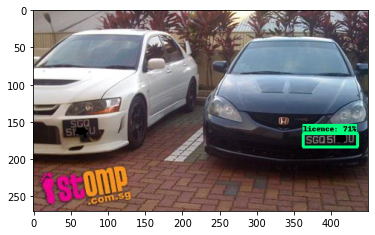

In [16]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.6,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [14]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [21]:
paths['APIMODEL_PATH']

'Tensorflow/models'

In [22]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [23]:
command = "python3 {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [24]:
print(command)

python3 Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/export


In [25]:
!{command}

2022-05-02 02:40:13.947421: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:40:13.955751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:40:13.956115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:40:13.963270: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

W0502 02:40:53.335837 140314891806528 save.py:260] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalClassHead_layer_call_fn while saving (showing 5 of 104). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model/assets
I0502 02:40:59.077809 140314891806528 builder_impl.py:779] Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model/assets
INFO:tensorflow:Writing pipeline config file to Tensorflow/workspace/models/my_ssd_mobnet/export/pipeline.config
I0502 02:40:59.931547 140314891806528 config_util.py:253] Writing pipeline config file to Tensorflow/workspace/models/my_ssd_mobnet/export/pipeline.config


# 11. Conversion to TFJS

In [26]:
!pip install tensorflowjs

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 KB 12.5 MB/s eta 0:00:00


In [27]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [28]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model Tensorflow/workspace/models/my_ssd_mobnet/tfjsexport


In [29]:
!{command}

2022-05-02 02:42:11.959322: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:42:11.968094: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:42:11.968432: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:42:11.969056: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [30]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [31]:
command = "python3 {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [32]:
print(command)

python3 Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport


In [33]:
!{command}

2022-05-02 02:43:32.620485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:43:32.630322: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:43:32.630778: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:43:32.638386: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

W0502 02:44:03.512482 139802420516672 save.py:260] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalClassHead_layer_call_fn while saving (showing 5 of 104). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/assets
I0502 02:44:09.219515 139802420516672 builder_impl.py:779] Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/assets


In [34]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [35]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [36]:
print(command)

tflite_convert --saved_model_dir=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model --output_file=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [37]:
!{command}

2022-05-02 02:45:15.525625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:45:15.534802: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:45:15.535263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:45:16.040638: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

# 13. Zip and Export Models 

In [38]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [39]:
paths['CHECKPOINT_PATH']

'Tensorflow/workspace/models/my_ssd_mobnet'

# Applying easyocr

In [1]:
import tensorflow as tf

In [2]:
# prevent gpu from complete consumption
gpus=tf.config.list_physical_devices('gpu')
if gpus:
    tf.config.experimental.set_virtual_device_configuration(gpus[0],
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])

2022-05-02 02:53:42.803735: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:53:42.813339: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 02:53:42.814261: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [13]:
config

{'model': ssd {
   num_classes: 1
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [19]:
import cv2
import numpy as np

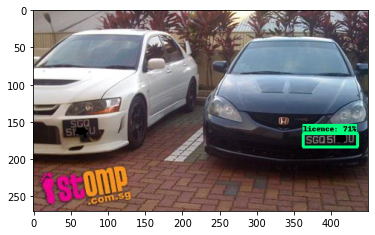

In [17]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars402.png')
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.6,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [30]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

In [31]:
!pip3 install easyocr

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.8/70.8 MB 22.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 66.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 33.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.9/193.9 KB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.6 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 82.5 MB/s eta 0:00:000m eta 0:00:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64


In [34]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [18]:
import easyocr

/home/paperspace/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
detection_threshold=0.6

In [25]:
image=image_np_with_detections
scores=list(filter(lambda x:x>detection_threshold, detections['detection_scores']))
scores

[0.70593834]

In [26]:
boxes=detections['detection_boxes'][:len(scores)]
boxes

array([[0.61520827, 0.80646807, 0.67950296, 0.9698009 ]], dtype=float32)

In [27]:
classes=detections['detection_classes'][:len(scores)]
classes

array([0])

In [28]:
width=image.shape[1]
height=image.shape[0]

In [29]:
width,height

(450, 270)

In [30]:
# applying ROI filtering & ocr

for idx,box in enumerate(boxes):
    roi=box*[height,width,height,width]
    region=image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader=easyocr.Reader(['en'])
    ocr_result=reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region,cv2.COLOR_BGR2RGB))

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.